In [1]:
import pandas as pd
import math
import pandas_datareader as web
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf
import keras
from keras.layers import *
from keras import *
from sklearn.preprocessing import MinMaxScaler

Using TensorFlow backend.


In [2]:
df = web.DataReader("^GDAXI", data_source="yahoo", start="1990-01-01", end="2020-05-17")

In [3]:
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
1990-01-02,1788.890015,1788.890015,1788.890015,1788.890015,0.0,1788.890015
1990-01-03,1867.290039,1867.290039,1867.290039,1867.290039,0.0,1867.290039
1990-01-04,1830.920044,1830.920044,1830.920044,1830.920044,0.0,1830.920044
1990-01-05,1812.900024,1812.900024,1812.900024,1812.900024,0.0,1812.900024
1990-01-08,1841.469971,1841.469971,1841.469971,1841.469971,0.0,1841.469971


In [4]:
df.shape

(7673, 6)

C:\Users\A675866\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


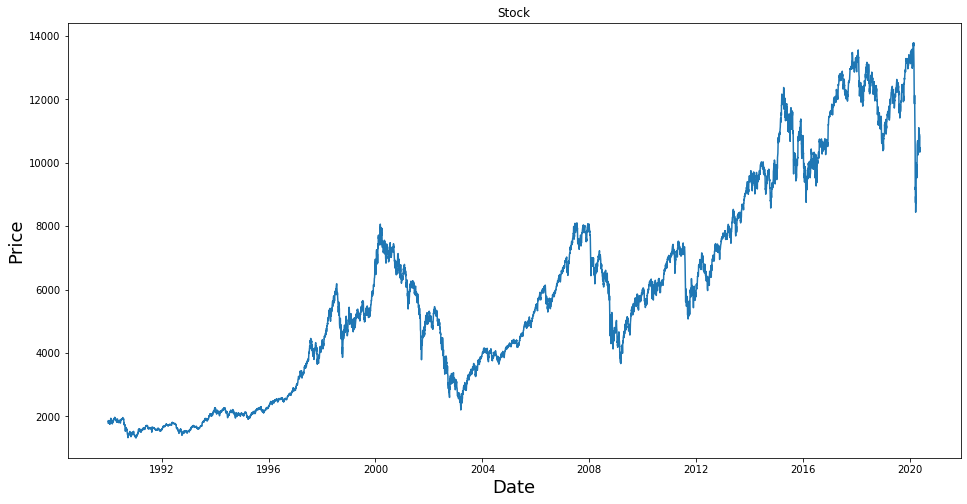

In [5]:
plt.figure(figsize=(16,8))
plt.title("Stock")
plt.xlabel("Date", fontsize=(18))
plt.ylabel("Price", fontsize=18)
plt.plot(df["Close"])
plt.show()

In [6]:
#data = df.filter(["Close"])
data = df.filter(["Close"])
days = df.filter(["Date"])
dataset = data.values
print(dataset)
train_length = math.ceil(len(dataset) * 0.8)
train_length

[[ 1788.89001465]
 [ 1867.29003906]
 [ 1830.92004395]
 ...
 [10542.66015625]
 [10337.01953125]
 [10465.16992188]]


6139

In [7]:
train_data = dataset[0:train_length,:]
scaler = MinMaxScaler(feature_range=(0,1))
train_data = scaler.fit_transform(train_data)

In [8]:
x_train=[]
y_train=[]
for x in range(60,train_length):
    x_train.append(train_data[x-60:x ,:])
    y_train.append(train_data[x,:])


In [9]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [10]:
x_train.reshape(x_train.shape[0], x_train.shape[1],1)

array([[[0.05598525],
        [0.06529002],
        [0.06097351],
        ...,
        [0.07294034],
        [0.07174045],
        [0.07329995]],

       [[0.06529002],
        [0.06097351],
        [0.05883484],
        ...,
        [0.07174045],
        [0.07329995],
        [0.0723671 ]],

       [[0.06097351],
        [0.05883484],
        [0.06222561],
        ...,
        [0.07329995],
        [0.0723671 ],
        [0.07134405]],

       ...,

       [[1.        ],
        [0.99678848],
        [0.99847613],
        ...,
        [0.97007166],
        [0.97191832],
        [0.96576939]],

       [[0.99678848],
        [0.99847613],
        [0.99728813],
        ...,
        [0.97191832],
        [0.96576939],
        [0.94924275]],

       [[0.99847613],
        [0.99728813],
        [0.98671698],
        ...,
        [0.96576939],
        [0.94924275],
        [0.95207689]]])

In [13]:
model = Sequential()
model.add(LSTM(units= 50, return_sequences = True, input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units = 50, return_sequences = False))
model.add(Dropout(0.2))
model.add(Dense(units = 1))
model.compile(optimizer="adam", loss="mean_squared_error", metrics=["accuracy"])
model.fit(x_train, y_train, batch_size=32, epochs=1)

Epoch 1/1
6079/6079 [==============================] - 28s 5ms/step - loss: 0.0070 - accuracy: 3.2900e-04


In [14]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_7 (LSTM)                (None, 60, 50)            10400     
_________________________________________________________________
dropout_7 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_8 (LSTM)                (None, 60, 50)            20200     
_________________________________________________________________
dropout_8 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_9 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dropout_9 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                

In [15]:
test_data = dataset[train_length-60:,:]
scaled_test_data = scaler.fit_transform(test_data)
x_test = []
y_test = scaled_test_data[train_length:,:]
for x in range(60,len(test_data)):
    x_test.append(scaled_test_data[x-60:x,:])
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],x_train.shape[2]))
x_test.shape

(1534, 60, 1)

In [16]:
predict = model.predict(x_test)
predict = scaler.inverse_transform(predict)
predict

array([[ 9475.136 ],
       [ 9473.171 ],
       [ 9468.183 ],
       ...,
       [10597.586 ],
       [10622.2705],
       [10639.833 ]], dtype=float32)

In [17]:
training_data=data[:train_length]
valid = data[train_length:]
valid["Predictions"]=predict[:,:]
valid

C:\Users\A675866\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Close,Predictions
Date,,
2014-04-16,9317.820312,9475.135742
2014-04-17,9409.709961,9473.170898
2014-04-22,9600.089844,9468.182617
2014-04-23,9544.190430,9463.006836
2014-04-24,9548.679688,9458.848633
...,...,...
2020-05-11,10824.990234,10537.656250
2020-05-12,10819.500000,10568.605469
2020-05-13,10542.660156,10597.585938


(6139, 1)


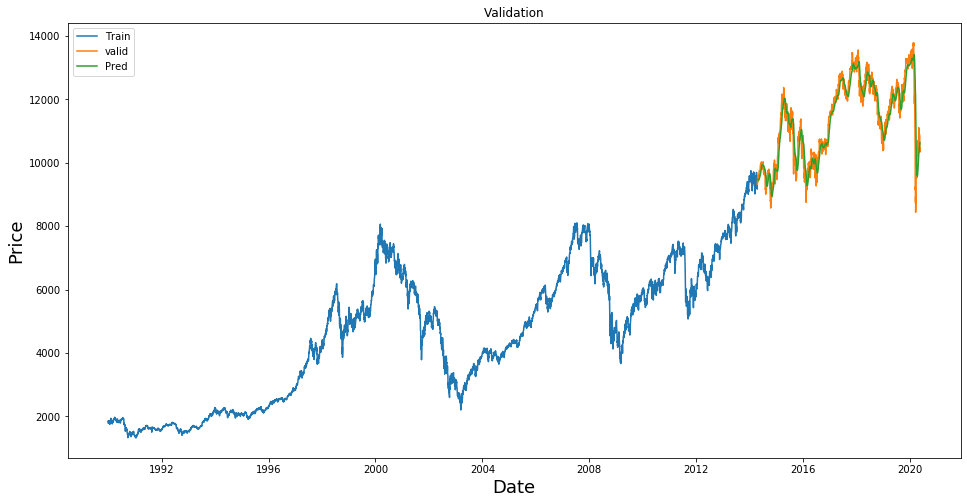

In [18]:
plt.figure(figsize=(16,8))
plt.title("Validation")
plt.xlabel("Date", fontsize=18)
plt.ylabel("Price", fontsize=18)
print(train_data.shape)
plt.plot(training_data)
plt.plot(valid[["Close", "Predictions"]])
plt.legend(["Train", "valid", "Pred"])
plt.show()

In [116]:
def future(days,training_data, dataset, scaler, valid):
    didx = pd.DatetimeIndex(start ='2020-05-15', freq ='D', periods = days) 
    didx.to_frame(index = True) 
    results = []
    test_data = dataset[len(dataset)-61:,:]
    scaled_test_data = scaler.fit_transform(test_data)
    print(scaled_test_data)
    if len(test_data):
        y_test = scaler.fit_transform(test_data)
    for day in range(days):
        x_test = []
        for x in range(60,len(scaled_test_data)):
            x_test = scaled_test_data[x-60:x,:]
        x_test = np.array(x_test)
        x_test = np.reshape(x_test, (1, x_test.shape[0], x_test.shape[1]))
        predict = model.predict(x_test)
        scaled_test_data = np.append(scaled_test_data,predict[0][0])
        scaled_test_data = np.reshape(scaled_test_data, (scaled_test_data.shape[0],1))
        helper = scaler.inverse_transform(predict)[0][0]
        results.append(helper)
    didx = pd.DataFrame(didx) 
    didx.assign(Predictions= results)
    didx = didx.filter(["Predictions"])
    print(didx.head())
    didx = didx.Predictions
    plot(training_data, valid, didx)

In [117]:
def plot(training_data, test, predictions):
    plt.figure(figsize=(16,8))
    plt.title("Validation")
    plt.xlabel("Date", fontsize=18)
    plt.ylabel("Price", fontsize=18)
    plt.plot(training_data)
    plt.plot(test)
    plt.plot(predictions)
    plt.legend(["Train", "valid", "Pred"])
    print(test)
    print(predictions)
    plt.show()

In [118]:
future(10,training_data,dataset, scaler, [])

C:\Users\A675866\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  


[[0.97983847]
 [1.        ]
 [0.97662367]
 [0.9607895 ]
 [0.85903892]
 [0.81326807]
 [0.81034877]
 [0.73415692]
 [0.64493222]
 [0.63885821]
 [0.66270572]
 [0.68931748]
 [0.65510001]
 [0.57976286]
 [0.40830207]
 [0.3803385 ]
 [0.37345454]
 [0.13453916]
 [0.1478076 ]
 [0.05620418]
 [0.09301714]
 [0.        ]
 [0.03155238]
 [0.0911191 ]
 [0.05599854]
 [0.23542025]
 [0.26790202]
 [0.2915963 ]
 [0.22269403]
 [0.25700116]
 [0.27941815]
 [0.2062802 ]
 [0.21115562]
 [0.20273065]
 [0.30547435]
 [0.3581235 ]
 [0.35367068]
 [0.3970292 ]
 [0.42168081]
 [0.34373482]
 [0.34780797]
 [0.40844433]
 [0.41781733]
 [0.33814131]
 [0.36903185]
 [0.38750097]
 [0.35426915]
 [0.41484196]
 [0.44020801]
 [0.49857596]
 [0.45255254]
 [0.3787133 ]
 [0.42783353]
 [0.40478265]
 [0.43340824]
 [0.46056423]
 [0.44569871]
 [0.44467198]
 [0.39289999]
 [0.35444301]
 [0.37840849]]
Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4]


AttributeError: 'DataFrame' object has no attribute 'Predictions'

In [ ]:
test_data = dataset[0:11,:]
print(len(test_data))
x_test = []
y_test =[]
for x in range(9,len(test_data)):
    x_test.append(test_data[x-9:x,:])
    y_test.append(test_data[x,:])
print(x_test)
print(y_test)

In [ ]:
days[train_length:]
test = days[-2:-1]
test

In [ ]:
rng = pd.date_range('2020-05-17', periods=200, freq='D')

AttributeError: 'DataFrame' object has no attribute 'DatetimeIndex'

In [87]:
didx = pd.DatetimeIndex(start ='2020-05-15', freq ='D', periods = 1) 
didx.to_frame(index = True) 

C:\Users\A675866\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  """Entry point for launching an IPython kernel.


,0
2020-05-15,2020-05-15


In [108]:
a = [1]
df2 = pd.DataFrame(didx) 

In [109]:
df2.assign(a=a)

,0,a
0,2020-05-15,1
